In [43]:
import pandas as pd
import numpy as np

#we import these 2 librabry to work with data

In [44]:
np.random.seed(42)

#np.random is used to generate random values from the data - we use seed 42 as a seed number so that the data wont chnage each time 42 is a pop culture referance guide to galaxy

In [45]:
dates = pd.date_range(start = "2023-01-01", end = "2023-12-31")
region = ["North","South","East","West"]
categories = ['Electronics', 'Furniture', 'Clothing', 'Appliances']
product_names = ['Product_A', 'Product_B', 'Product_C', 'Product_D', 'Product_E']
customer_types = ['New', 'Regular']


#we will be taking labelled data : row and column so we use pandas

In [46]:
data = {
    'Date': np.random.choice(dates, 365),
    'Product_Category': np.random.choice(categories, 365),
    'Product_Name': np.random.choice(product_names, 365),
    'Quantity_Sold': np.random.randint(1, 20, 365),
    'Unit_Price': np.random.randint(100, 500, 365),
    'Region': np.random.choice(region, 365),
    'Customer_Type': np.random.choice(customer_types, 365),
}

#now we generate random data using np library

In [47]:
df = pd.DataFrame(data)

#fit the data into a datta frame

In [48]:
print(df.head())

        Date Product_Category Product_Name  Quantity_Sold  Unit_Price Region  \
0 2023-04-13        Furniture    Product_A             14         475  North   
1 2023-12-15         Clothing    Product_A              4         103  South   
2 2023-09-28         Clothing    Product_E             13         448   West   
3 2023-04-17        Furniture    Product_D             10         496   East   
4 2023-03-13        Furniture    Product_D             18         309   West   

  Customer_Type  
0       Regular  
1           New  
2       Regular  
3           New  
4           New  


In [49]:
df["Sales_Amount"] = df["Quantity_Sold"] * df["Unit_Price"]

In [50]:
print(df.head())

        Date Product_Category Product_Name  Quantity_Sold  Unit_Price Region  \
0 2023-04-13        Furniture    Product_A             14         475  North   
1 2023-12-15         Clothing    Product_A              4         103  South   
2 2023-09-28         Clothing    Product_E             13         448   West   
3 2023-04-17        Furniture    Product_D             10         496   East   
4 2023-03-13        Furniture    Product_D             18         309   West   

  Customer_Type  Sales_Amount  
0       Regular          6650  
1           New           412  
2       Regular          5824  
3           New          4960  
4           New          5562  


In [51]:
print(df.dropna())

#data cleaning

          Date Product_Category Product_Name  Quantity_Sold  Unit_Price  \
0   2023-04-13        Furniture    Product_A             14         475   
1   2023-12-15         Clothing    Product_A              4         103   
2   2023-09-28         Clothing    Product_E             13         448   
3   2023-04-17        Furniture    Product_D             10         496   
4   2023-03-13        Furniture    Product_D             18         309   
..         ...              ...          ...            ...         ...   
360 2023-10-07       Appliances    Product_C             11         313   
361 2023-04-24      Electronics    Product_E              8         278   
362 2023-10-15      Electronics    Product_E             12         187   
363 2023-12-08        Furniture    Product_E              7         140   
364 2023-05-31       Appliances    Product_C             15         175   

    Region Customer_Type  Sales_Amount  
0    North       Regular          6650  
1    South       

In [52]:
print(df.isnull().sum) #is null returns bool value

<bound method DataFrame.sum of       Date  Product_Category  Product_Name  Quantity_Sold  Unit_Price  Region  \
0    False             False         False          False       False   False   
1    False             False         False          False       False   False   
2    False             False         False          False       False   False   
3    False             False         False          False       False   False   
4    False             False         False          False       False   False   
..     ...               ...           ...            ...         ...     ...   
360  False             False         False          False       False   False   
361  False             False         False          False       False   False   
362  False             False         False          False       False   False   
363  False             False         False          False       False   False   
364  False             False         False          False       False   False 

In [53]:
df["Date"] = pd.to_datetime(df["Date"])

In [54]:

print(df.dtypes)

Date                datetime64[ns]
Product_Category            object
Product_Name                object
Quantity_Sold                int64
Unit_Price                   int64
Region                      object
Customer_Type               object
Sales_Amount                 int64
dtype: object


In [79]:
df["Month"] = df["Date"].dt.month_name()
df["Weekday"] = df["Date"].dt.weekday

#preprocessing

In [80]:

print(df.head())

        Date Product_Category Product_Name  Quantity_Sold  Unit_Price Region  \
0 2023-04-13        Furniture    Product_A             14         475  North   
1 2023-12-15         Clothing    Product_A              4         103  South   
2 2023-09-28         Clothing    Product_E             13         448   West   
3 2023-04-17        Furniture    Product_D             10         496   East   
4 2023-03-13        Furniture    Product_D             18         309   West   

  Customer_Type  Sales_Amount      Month  Weekday  
0       Regular          6650      April        3  
1           New           412   December        4  
2       Regular          5824  September        3  
3           New          4960      April        0  
4           New          5562      March        0  


In [57]:

#now data is cleaned and preprocessed now we analyse the data using EDA

In [58]:
#EDA

#1 FIND SALES PERFORMACE BY REGION

import matplotlib.pyplot as plt
import seaborn as sns

region_sales = df.groupby('Region')['Sales_Amount'].sum().reset_index()


region_sales = region_sales.sort_values(by = "Sales_Amount",ascending=False)
print(region_sales)
#we are grouping the regions with its respective sum of total sales amount with an index thats reset index

  Region  Sales_Amount
2  South        324883
0   East        279740
3   West        259929
1  North        237442


<ipython-input-81-77ecfcd7a968>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = region_sales, x="Region", y ="Sales_Amount", palette= "viridis")


<Axes: xlabel='Region', ylabel='Sales_Amount'>

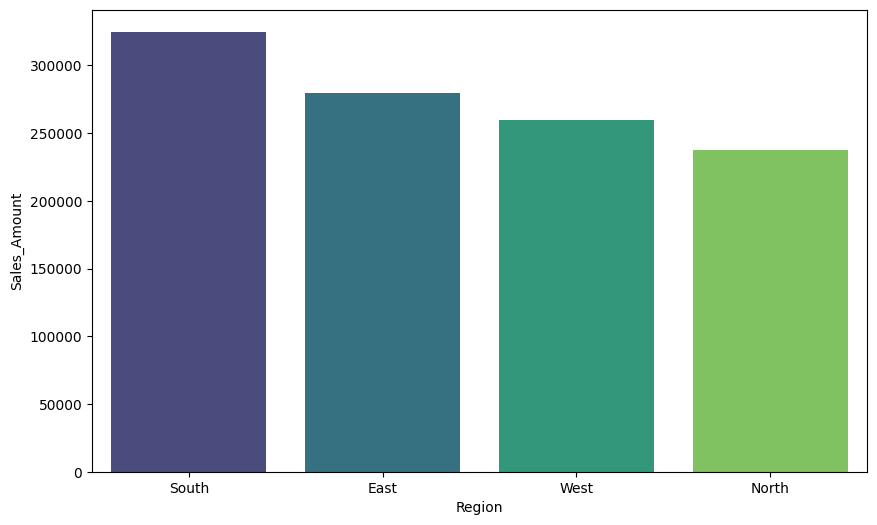

In [81]:
# rep the data in a map

plt.figure(figsize=(10,6))
sns.barplot(data = region_sales, x="Region", y ="Sales_Amount", palette= "viridis")

  Product_Category  Sales_Amount
0       Appliances        259868
1         Clothing        220039
2      Electronics        338367
3        Furniture        283720


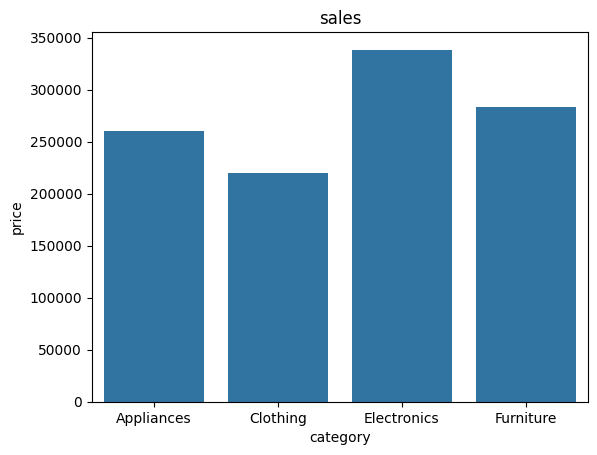

In [67]:
#To Understand which category has highest sales

cat_sales = df.groupby("Product_Category")["Sales_Amount"].sum().reset_index()
print(cat_sales)

sns.barplot(data=cat_sales,x="Product_Category", y="Sales_Amount")
plt.title("sales")
plt.xlabel("category")
plt.ylabel("price")
plt.show()


        Month  Sales_Amount
0       April         99686
1      August        107724
2    December         88863
3    February        130227
4     January         70770
5        July         93463
6        June         85533
7       March         40200
8         May         89787
9    November         62676
10    October        121847
11  September        111218


Text(0, 0.5, 'Sales')

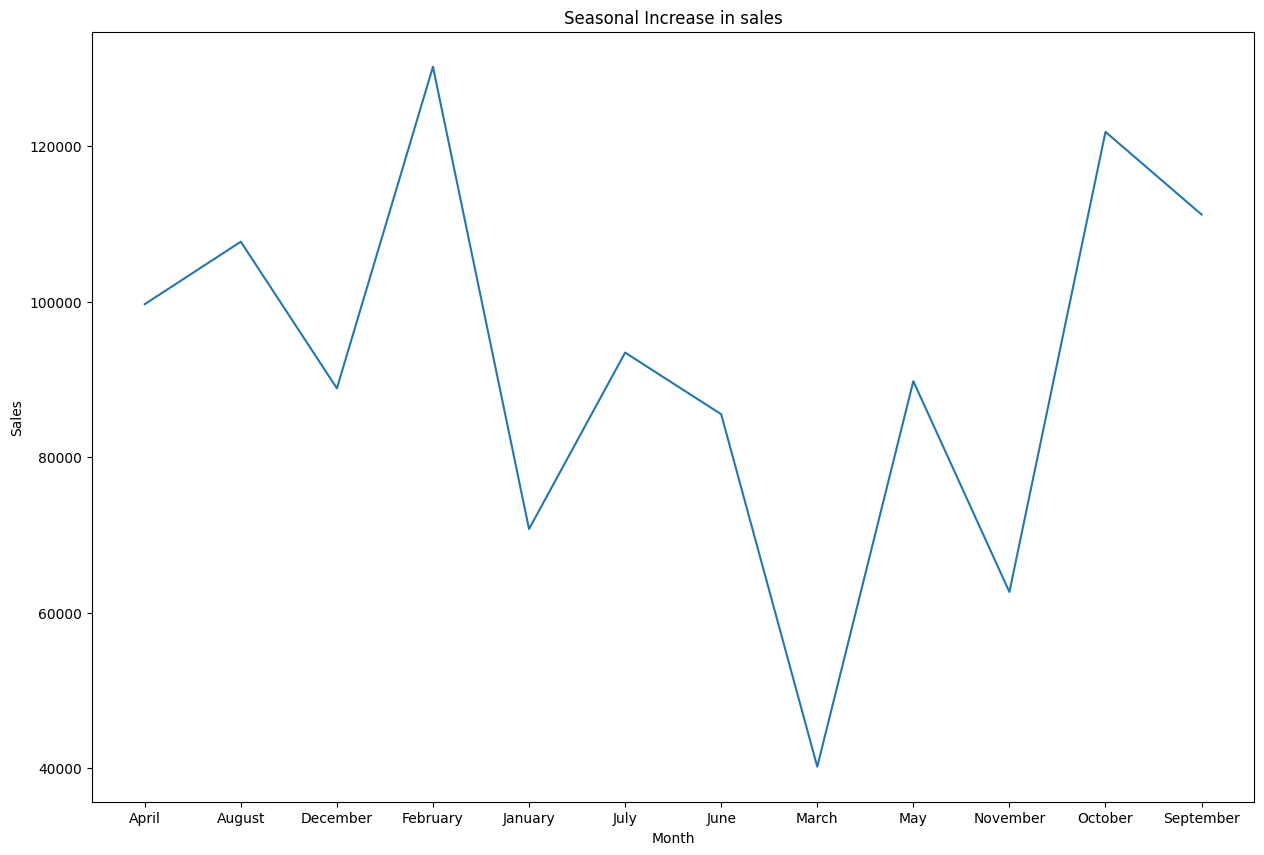

In [91]:
# to understand which month has the highest sales in seasonal

seasonal = df.groupby("Month")["Sales_Amount"].sum().reset_index()
print(seasonal)

plt.figure(figsize=(15,10))
sns.lineplot(data=seasonal, x="Month",y="Sales_Amount")
plt.title("Seasonal Increase in sales")
plt.xlabel("Month")
plt.ylabel("Sales")


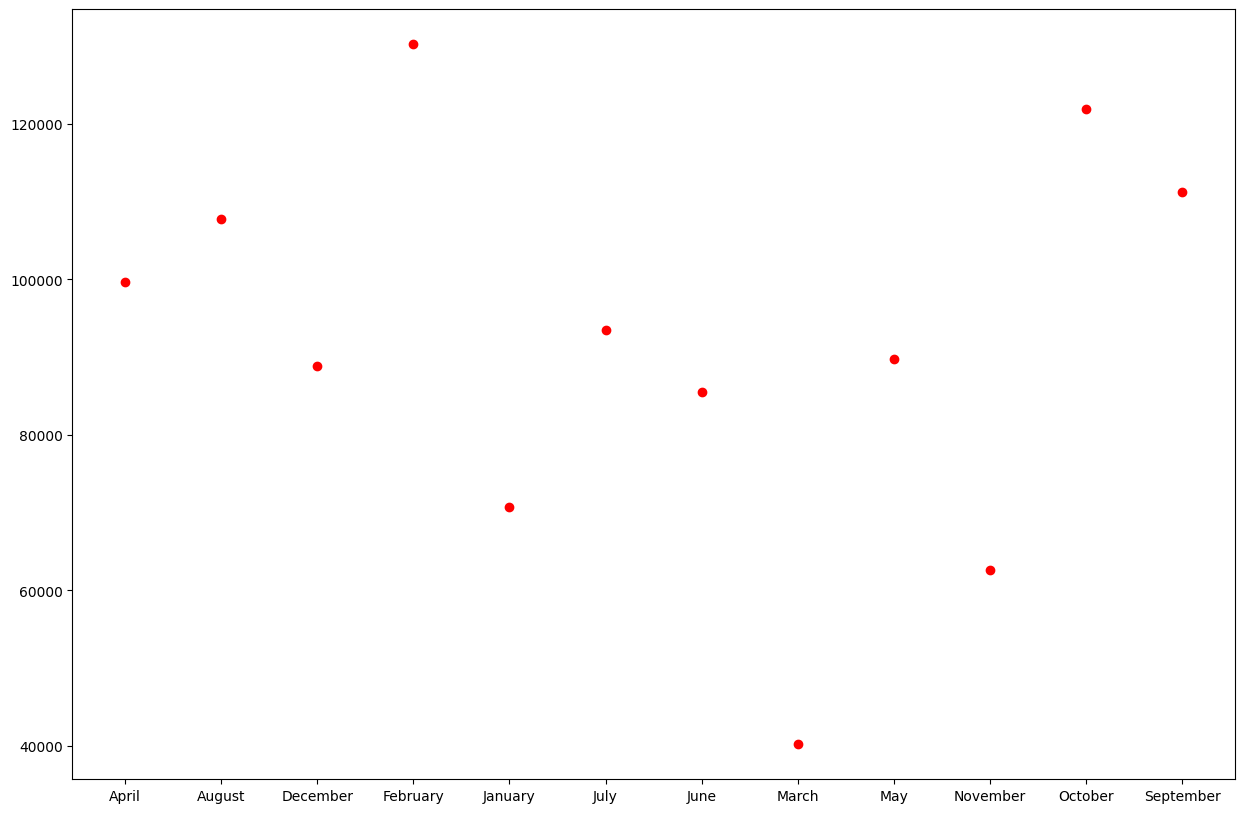

In [89]:
plt.figure(figsize=(15, 10))

plt.scatter(seasonal["Month"],seasonal["Sales_Amount"],color = "red")



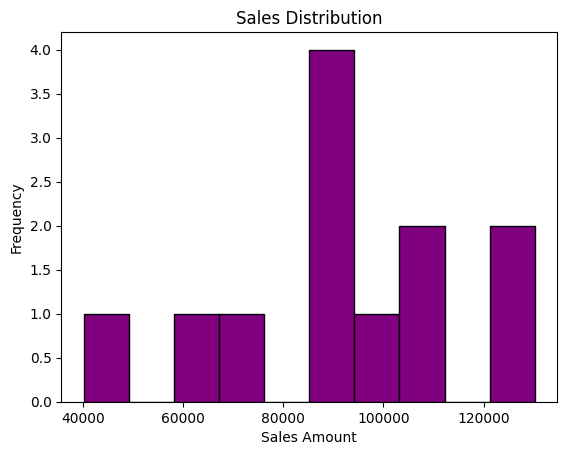

In [85]:
plt.hist(seasonal["Sales_Amount"], bins=10, color='purple', edgecolor='black')
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()


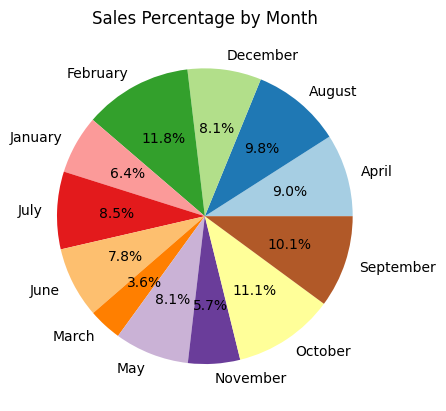

In [84]:
plt.pie(seasonal["Sales_Amount"], labels=seasonal["Month"], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Sales Percentage by Month")
plt.show()
